In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:18,  6.22it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


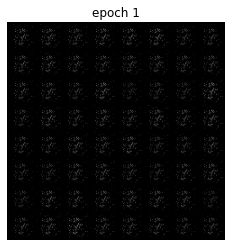

Epoch 1 of 100
Generator loss: 1.64728116, Discriminator loss: 0.44174194


118it [00:19,  5.91it/s]                                                        


Epoch 2 of 100
Generator loss: 2.84960025, Discriminator loss: 0.60191359


118it [00:20,  5.73it/s]                                                        


Epoch 3 of 100
Generator loss: 2.80858680, Discriminator loss: 0.41132215


118it [00:19,  6.13it/s]                                                        


Epoch 4 of 100
Generator loss: 1.65752693, Discriminator loss: 0.57675518


118it [00:19,  6.14it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


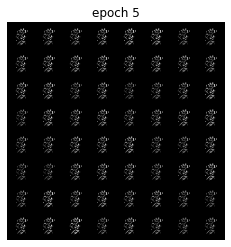

Epoch 5 of 100
Generator loss: 1.30562838, Discriminator loss: 0.61967888


118it [00:20,  5.78it/s]                                                        


Epoch 6 of 100
Generator loss: 2.00088968, Discriminator loss: 0.50025797


118it [00:22,  5.15it/s]                                                        


Epoch 7 of 100
Generator loss: 1.62860083, Discriminator loss: 0.59769506


118it [00:23,  5.13it/s]                                                        


Epoch 8 of 100
Generator loss: 1.94665283, Discriminator loss: 0.55157644


118it [00:22,  5.22it/s]                                                        


Epoch 9 of 100
Generator loss: 1.74577917, Discriminator loss: 0.49421484


118it [00:22,  5.34it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


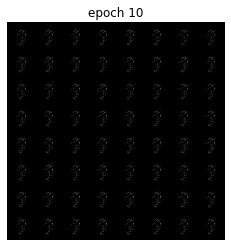

Epoch 10 of 100
Generator loss: 1.41261857, Discriminator loss: 0.55381830


118it [00:20,  5.80it/s]                                                        


Epoch 11 of 100
Generator loss: 1.99938804, Discriminator loss: 0.54866145


118it [00:19,  5.91it/s]                                                        


Epoch 12 of 100
Generator loss: 1.38814143, Discriminator loss: 0.64368522


118it [00:20,  5.84it/s]                                                        


Epoch 13 of 100
Generator loss: 1.03743278, Discriminator loss: 0.63657627


118it [00:21,  5.54it/s]                                                        


Epoch 14 of 100
Generator loss: 1.43184247, Discriminator loss: 0.54240890


118it [00:20,  5.69it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


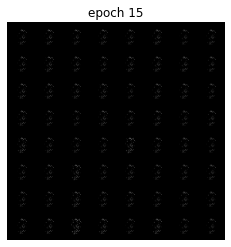

Epoch 15 of 100
Generator loss: 1.09829092, Discriminator loss: 0.61383776


118it [00:19,  5.91it/s]                                                        


Epoch 16 of 100
Generator loss: 1.73355866, Discriminator loss: 0.39823546


118it [00:20,  5.86it/s]                                                        


Epoch 17 of 100
Generator loss: 2.34610748, Discriminator loss: 0.42587642


118it [00:20,  5.77it/s]                                                        


Epoch 18 of 100
Generator loss: 1.93968328, Discriminator loss: 0.42830646


118it [00:21,  5.50it/s]                                                        


Epoch 19 of 100
Generator loss: 1.93888223, Discriminator loss: 0.37706817


118it [00:20,  5.73it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


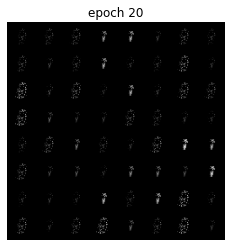

Epoch 20 of 100
Generator loss: 1.96297244, Discriminator loss: 0.40854584


118it [00:20,  5.85it/s]                                                        


Epoch 21 of 100
Generator loss: 2.15107062, Discriminator loss: 0.32910611


118it [00:20,  5.72it/s]                                                        


Epoch 22 of 100
Generator loss: 2.29000547, Discriminator loss: 0.32196101


118it [00:20,  5.82it/s]                                                        


Epoch 23 of 100
Generator loss: 1.93188750, Discriminator loss: 0.45046556


118it [00:20,  5.80it/s]                                                        


Epoch 24 of 100
Generator loss: 2.37287192, Discriminator loss: 0.34144197


118it [00:21,  5.59it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


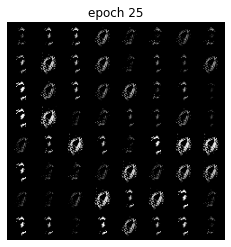

Epoch 25 of 100
Generator loss: 2.55563182, Discriminator loss: 0.34822850


118it [00:20,  5.78it/s]                                                        


Epoch 26 of 100
Generator loss: 2.44450434, Discriminator loss: 0.35661218


118it [00:20,  5.80it/s]                                                        


Epoch 27 of 100
Generator loss: 2.32088194, Discriminator loss: 0.35841964


118it [00:21,  5.38it/s]                                                        


Epoch 28 of 100
Generator loss: 2.54814347, Discriminator loss: 0.36001136


118it [00:24,  4.84it/s]                                                        


Epoch 29 of 100
Generator loss: 2.49834485, Discriminator loss: 0.38246511


118it [00:25,  4.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


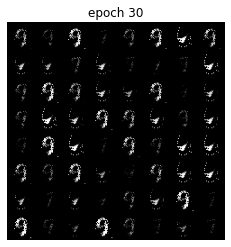

Epoch 30 of 100
Generator loss: 2.45302426, Discriminator loss: 0.37295200


118it [00:22,  5.24it/s]                                                        


Epoch 31 of 100
Generator loss: 2.07721295, Discriminator loss: 0.39183041


118it [00:21,  5.47it/s]                                                        


Epoch 32 of 100
Generator loss: 2.05763896, Discriminator loss: 0.45217596


118it [00:21,  5.58it/s]                                                        


Epoch 33 of 100
Generator loss: 2.05895412, Discriminator loss: 0.39008150


118it [00:22,  5.32it/s]                                                        


Epoch 34 of 100
Generator loss: 2.18875548, Discriminator loss: 0.40512543


118it [00:23,  5.08it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


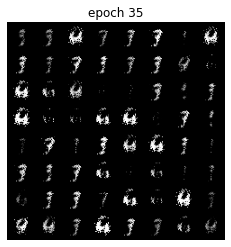

Epoch 35 of 100
Generator loss: 2.24660870, Discriminator loss: 0.40279849


118it [00:21,  5.51it/s]                                                        


Epoch 36 of 100
Generator loss: 2.15870151, Discriminator loss: 0.38969759


118it [00:20,  5.64it/s]                                                        


Epoch 37 of 100
Generator loss: 2.00356451, Discriminator loss: 0.42083113


118it [00:20,  5.64it/s]                                                        


Epoch 38 of 100
Generator loss: 1.87989599, Discriminator loss: 0.42456415


118it [00:21,  5.55it/s]                                                        


Epoch 39 of 100
Generator loss: 2.08345800, Discriminator loss: 0.39214041


118it [00:22,  5.29it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


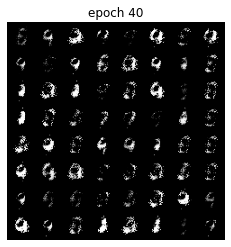

Epoch 40 of 100
Generator loss: 1.99557430, Discriminator loss: 0.41998768


118it [00:23,  5.06it/s]                                                        


Epoch 41 of 100
Generator loss: 2.01834801, Discriminator loss: 0.41929600


118it [00:22,  5.18it/s]                                                        


Epoch 42 of 100
Generator loss: 2.16329498, Discriminator loss: 0.39586444


118it [00:21,  5.51it/s]                                                        


Epoch 43 of 100
Generator loss: 2.16202111, Discriminator loss: 0.38922435


118it [00:20,  5.63it/s]                                                        


Epoch 44 of 100
Generator loss: 2.15465599, Discriminator loss: 0.40333036


118it [00:20,  5.70it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


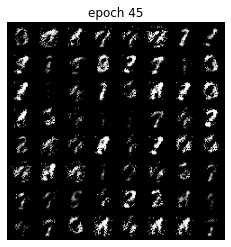

Epoch 45 of 100
Generator loss: 2.21229866, Discriminator loss: 0.38469516


118it [00:20,  5.67it/s]                                                        


Epoch 46 of 100
Generator loss: 2.14572214, Discriminator loss: 0.44366946


118it [00:21,  5.60it/s]                                                        


Epoch 47 of 100
Generator loss: 2.17969092, Discriminator loss: 0.39858313


118it [00:20,  5.74it/s]                                                        


Epoch 48 of 100
Generator loss: 2.14322971, Discriminator loss: 0.41161169


118it [00:20,  5.88it/s]                                                        


Epoch 49 of 100
Generator loss: 1.85852773, Discriminator loss: 0.42616287


118it [00:20,  5.70it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


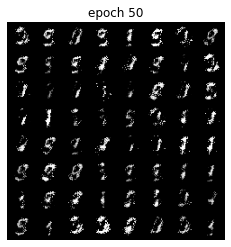

Epoch 50 of 100
Generator loss: 2.04850295, Discriminator loss: 0.41033860


118it [00:20,  5.75it/s]                                                        


Epoch 51 of 100
Generator loss: 2.13843565, Discriminator loss: 0.40127109


118it [00:20,  5.87it/s]                                                        


Epoch 52 of 100
Generator loss: 1.93928796, Discriminator loss: 0.43600186


118it [00:20,  5.77it/s]                                                        


Epoch 53 of 100
Generator loss: 1.90810197, Discriminator loss: 0.45675311


118it [00:20,  5.66it/s]                                                        


Epoch 54 of 100
Generator loss: 1.95560504, Discriminator loss: 0.43639592


118it [00:19,  5.91it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


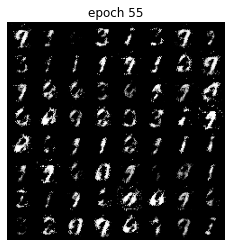

Epoch 55 of 100
Generator loss: 2.12650813, Discriminator loss: 0.39865960


118it [00:20,  5.81it/s]                                                        


Epoch 56 of 100
Generator loss: 2.02794645, Discriminator loss: 0.41139245


118it [00:20,  5.68it/s]                                                        


Epoch 57 of 100
Generator loss: 2.04842297, Discriminator loss: 0.43057714


118it [00:21,  5.61it/s]                                                        


Epoch 58 of 100
Generator loss: 1.91230115, Discriminator loss: 0.41175247


118it [00:20,  5.75it/s]                                                        


Epoch 59 of 100
Generator loss: 2.02681526, Discriminator loss: 0.41566917


118it [00:20,  5.84it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


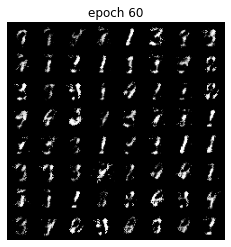

Epoch 60 of 100
Generator loss: 1.99049143, Discriminator loss: 0.41608187


118it [00:20,  5.86it/s]                                                        


Epoch 61 of 100
Generator loss: 1.95512387, Discriminator loss: 0.42726378


118it [00:21,  5.60it/s]                                                        


Epoch 62 of 100
Generator loss: 1.77715138, Discriminator loss: 0.44681312


118it [00:20,  5.84it/s]                                                        


Epoch 63 of 100
Generator loss: 1.97827811, Discriminator loss: 0.44269937


118it [00:19,  5.94it/s]                                                        


Epoch 64 of 100
Generator loss: 1.90089128, Discriminator loss: 0.43349586


118it [00:20,  5.74it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


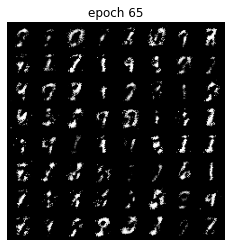

Epoch 65 of 100
Generator loss: 1.78533395, Discriminator loss: 0.45250100


118it [00:21,  5.52it/s]                                                        


Epoch 66 of 100
Generator loss: 1.95692093, Discriminator loss: 0.41642806


118it [00:20,  5.77it/s]                                                        


Epoch 67 of 100
Generator loss: 2.00289314, Discriminator loss: 0.42310450


118it [00:20,  5.83it/s]                                                        


Epoch 68 of 100
Generator loss: 1.89238790, Discriminator loss: 0.45207405


118it [00:20,  5.79it/s]                                                        


Epoch 69 of 100
Generator loss: 2.05249040, Discriminator loss: 0.41677655


118it [00:20,  5.72it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


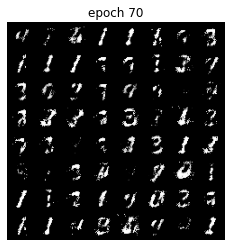

Epoch 70 of 100
Generator loss: 2.07022044, Discriminator loss: 0.41447392


118it [00:20,  5.80it/s]                                                        


Epoch 71 of 100
Generator loss: 1.95708515, Discriminator loss: 0.43293554


118it [00:20,  5.84it/s]                                                        


Epoch 72 of 100
Generator loss: 1.86354988, Discriminator loss: 0.44222963


118it [00:20,  5.88it/s]                                                        


Epoch 73 of 100
Generator loss: 1.86592457, Discriminator loss: 0.44389926


118it [00:20,  5.81it/s]                                                        


Epoch 74 of 100
Generator loss: 1.95089597, Discriminator loss: 0.42242093


118it [00:20,  5.69it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


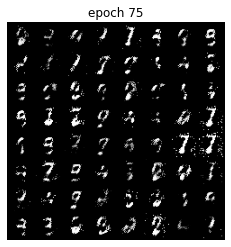

Epoch 75 of 100
Generator loss: 1.86599793, Discriminator loss: 0.44690052


118it [00:20,  5.74it/s]                                                        


Epoch 76 of 100
Generator loss: 1.96132834, Discriminator loss: 0.44798987


118it [00:20,  5.87it/s]                                                        


Epoch 77 of 100
Generator loss: 1.95898974, Discriminator loss: 0.42836138


118it [00:20,  5.85it/s]                                                        


Epoch 78 of 100
Generator loss: 1.90580949, Discriminator loss: 0.42387836


118it [00:21,  5.46it/s]                                                        


Epoch 79 of 100
Generator loss: 1.79588829, Discriminator loss: 0.44721494


118it [00:21,  5.59it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


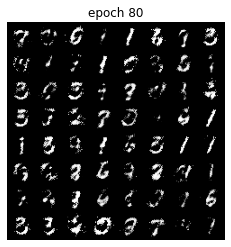

Epoch 80 of 100
Generator loss: 1.75564947, Discriminator loss: 0.46044355


118it [00:20,  5.85it/s]                                                        


Epoch 81 of 100
Generator loss: 1.80090604, Discriminator loss: 0.45422732


118it [00:20,  5.85it/s]                                                        


Epoch 82 of 100
Generator loss: 1.71093389, Discriminator loss: 0.46778460


118it [00:20,  5.86it/s]                                                        


Epoch 83 of 100
Generator loss: 1.69858901, Discriminator loss: 0.46796252


118it [00:20,  5.67it/s]                                                        


Epoch 84 of 100
Generator loss: 1.72020942, Discriminator loss: 0.46322065


118it [00:20,  5.82it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


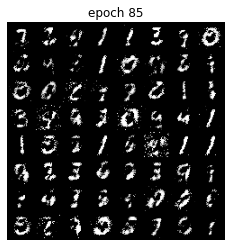

Epoch 85 of 100
Generator loss: 1.72714566, Discriminator loss: 0.47135649


118it [00:20,  5.90it/s]                                                        


Epoch 86 of 100
Generator loss: 1.83313139, Discriminator loss: 0.45217312


118it [00:20,  5.86it/s]                                                        


Epoch 87 of 100
Generator loss: 1.76648783, Discriminator loss: 0.45642375


118it [00:20,  5.82it/s]                                                        


Epoch 88 of 100
Generator loss: 1.76526668, Discriminator loss: 0.45995500


118it [00:20,  5.78it/s]                                                        


Epoch 89 of 100
Generator loss: 1.74770637, Discriminator loss: 0.45761517


118it [00:20,  5.75it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


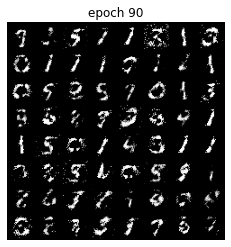

Epoch 90 of 100
Generator loss: 1.63998285, Discriminator loss: 0.48731164


118it [00:20,  5.86it/s]                                                        


Epoch 91 of 100
Generator loss: 1.73879975, Discriminator loss: 0.45831777


118it [00:20,  5.86it/s]                                                        


Epoch 92 of 100
Generator loss: 1.76890170, Discriminator loss: 0.46803930


118it [00:20,  5.85it/s]                                                        


Epoch 93 of 100
Generator loss: 1.64855009, Discriminator loss: 0.48813173


118it [00:21,  5.61it/s]                                                        


Epoch 94 of 100
Generator loss: 1.62009014, Discriminator loss: 0.47521958


118it [00:22,  5.21it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


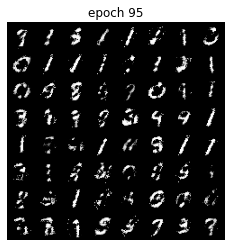

Epoch 95 of 100
Generator loss: 1.70596909, Discriminator loss: 0.46002132


118it [00:21,  5.40it/s]                                                        


Epoch 96 of 100
Generator loss: 1.73623838, Discriminator loss: 0.47408556


118it [00:21,  5.38it/s]                                                        


Epoch 97 of 100
Generator loss: 1.72407983, Discriminator loss: 0.46038403


118it [00:22,  5.16it/s]                                                        


Epoch 98 of 100
Generator loss: 1.69237207, Discriminator loss: 0.45714520


118it [00:25,  4.69it/s]                                                        


Epoch 99 of 100
Generator loss: 1.74683414, Discriminator loss: 0.45528415


118it [00:24,  4.84it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


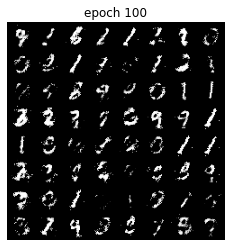

Epoch 100 of 100
Generator loss: 1.74451984, Discriminator loss: 0.46792855


In [14]:
torch.manual_seed(7777)

def generator_loss(disc_output_fake):
    ############ YOUR CODE HERE ##########
    return criterion(disc_output_fake, torch.ones_like(disc_output_fake))
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    real_labels = torch.rand_like(disc_output_real) * 0.1 + 0.9
    fake_labels = torch.rand_like(disc_output_fake) * 0.1
    real_loss = criterion(disc_output_real, real_labels)
    fake_loss = criterion(disc_output_fake, fake_labels)
    return (real_loss + fake_loss) / 2
    
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        batch_images, _ = data
        batch_images = batch_images.to(device)
        b_size = batch_images.size(0)
        
        real_data = batch_images.view(b_size, -1)
        disc_output_real = discriminator(real_data).view(-1)
        fake_data = generator(create_noise(b_size, nz)).detach()
        disc_output_fake = discriminator(fake_data).view(-1)
        
        d_loss = discriminator_loss(disc_output_real, disc_output_fake)
        optim_d.zero_grad()
        d_loss.backward()
        optim_d.step()
        
        fake_data = generator(create_noise(b_size, nz))
        disc_output_fake = discriminator(fake_data).view(-1)
        g_loss = generator_loss(disc_output_fake)
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        
        loss_d += d_loss.item()
        loss_g += g_loss.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or (epoch + 1) == 1:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

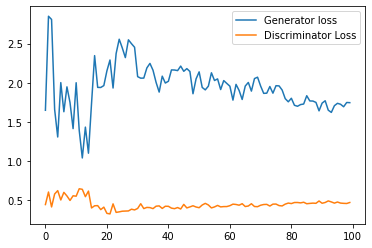

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')